In [74]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [75]:
# Load the dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv('data/loan_approval_dataset.csv')

# Data Exploration

In [76]:
## Display the shape of the DataFrame to know the number of rows and columns
print(df.shape)

(4270, 13)


In [77]:
#Display Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4270 non-null   int64  
 1    no_of_dependents          4270 non-null   int64  
 2    education                 4266 non-null   object 
 3    self_employed             4270 non-null   object 
 4    income_annum              4270 non-null   int64  
 5    loan_amount               4270 non-null   int64  
 6    loan_term                 4270 non-null   int64  
 7    cibil_score               4270 non-null   int64  
 8    residential_assets_value  4267 non-null   float64
 9    commercial_assets_value   4269 non-null   float64
 10   luxury_assets_value       4270 non-null   int64  
 11   bank_asset_value          4270 non-null   int64  
 12   loan_status               4270 non-null   object 
dtypes: float64(2), int64(8), object(3)
memory usage:

In [78]:
#Check the columns
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


From the above columns, I can see that every columns except 'loan_id' have space infront of their name.So, I clean them up to prevent any potential misunderstanings later on.

In [79]:
# Remove spaces from column names in the DataFrame
df.columns =df.columns.str.replace(' ','')

In [80]:
# Count the occurrences of each unique value in the 'loan_status' column
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1614
Name: count, dtype: int64

In [81]:
# Count the occurrences of each unique value in the 'no_of_dependents' column
df['no_of_dependents'].value_counts()

no_of_dependents
4    753
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [82]:
# Count the occurrences of each unique value in the 'self_employed' column
df['self_employed'].value_counts()

self_employed
 Yes    2151
 No     2119
Name: count, dtype: int64

In [83]:
# Count the occurrences of each unique value in the 'loan_term' column
df['loan_term'].value_counts()

loan_term
6     490
12    456
4     447
10    436
18    423
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

In [84]:
# Display the first 20 rows of the DataFrame 'df'
df.head(20)

loan_id  no_of_dependents      education self_employed  income_annum  \
0         1                 2       Graduate            No       9600000   
1         2                 0   Not Graduate           Yes       4100000   
2         3                 3       Graduate            No       9100000   
3         4                 3       Graduate            No       8200000   
4         5                 5   Not Graduate           Yes       9800000   
5         6                 0       Graduate           Yes       4800000   
6         7                 5       Graduate            No       8700000   
7         8                 2       Graduate           Yes       5700000   
8         9                 0       Graduate           Yes        800000   
9        10                 5   Not Graduate            No       1100000   
10       11                 4       Graduate           Yes       2900000   
11       12                 2   Not Graduate           Yes       6700000   
12       13                 3   Not Graduate           Yes       5000000   
13       14                 2       Graduate           Yes       9100000   
14       15                 1   Not Graduate            No       1900000   
15       16                 5   Not Graduate            No       4700000   
16       17                 2       Graduate           Yes        500000   
17       18                 4   Not Graduate           Yes       2900000   
18       19                 2       Graduate            No       2700000   
19       20                 5       Graduate            No       6300000   

    loan_amount  loan_term  cibil_score  residential_assets_value  \
0      29900000         12          778                 2400000.0   
1      12200000          8          417                 2700000.0   
2      29700000         20          506                 7100000.0   
3      30700000          8          467                18200000.0   
4      24200000         20          382                12400000.0   
5      13500000         10          319                 6800000.0   
6      33000000          4          678                22500000.0   
7      15000000         20          382                13200000.0   
8       2200000         20          782                 1300000.0   
9       4300000         10          388                 3200000.0   
10     11200000          2          547                 8100000.0   
11     22700000         18          538                15300000.0   
12     11600000         16          311                 6400000.0   
13     31500000         14          679                10800000.0   
14      7400000          6          469                 1900000.0   
15     10700000         10          794                 5700000.0   
16      1600000          4          663                 1300000.0   
17      9400000         14          780                 2900000.0   
18     10300000         10          736                       NaN   
19     14600000         12          652                10300000.0   

    commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                17600000.0             22700000           8000000    Approved  
1                 2200000.0              8800000           3300000    Rejected  
2                 4500000.0             33300000          12800000    Rejected  
3                 3300000.0             23300000           7900000    Rejected  
4                 8200000.0             29400000           5000000    Rejected  
5                 8300000.0             13700000           5100000    Rejected  
6                14800000.0             29200000           4300000    Approved  
7                 5700000.0             11800000           6000000    Rejected  
8                  800000.0              2800000            600000    Approved  
9                 1400000.0              3300000           1600000    Rejected  
10                4700000.0              9500000           3100000

In [86]:
#Check if there are any duplicated rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}" )

Number of duplicate rows: 1


In [87]:
#Drop the duplicated row
df = df.drop_duplicates()

In [88]:
#Check if there are any missing values
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   4
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    3
commercial_assets_value     1
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [91]:
#Since education is a string column, I assume that filling the missing values with the most frequent value would be the best
df['education'].fillna(df['education'].mode()[0], inplace=True)


After dealing with the missing values in the education column, I still have missing values in the 'residential_assets_value' and 'commercial_assets_value' columns. I need to determine whether these columns are normally distributed or have outliers so that I can decide whether to use means or medians for insertion.

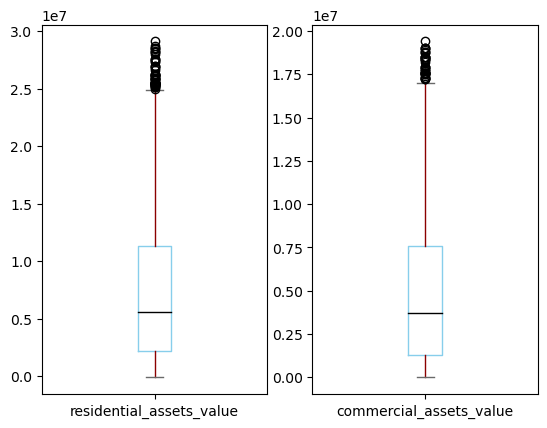

In [92]:
# Create box plots to check the distribution and presence of outliers in 'residential_assets_value' and 'commercial_assets_value' columns
df[['residential_assets_value', 'commercial_assets_value']].plot(kind='box', subplots=True, layout=(1, 2), sharex=False, sharey=False, color={'boxes': 'skyblue', 'whiskers': 'darkred', 'medians': 'black', 'caps': 'dimgray'})
plt.show()

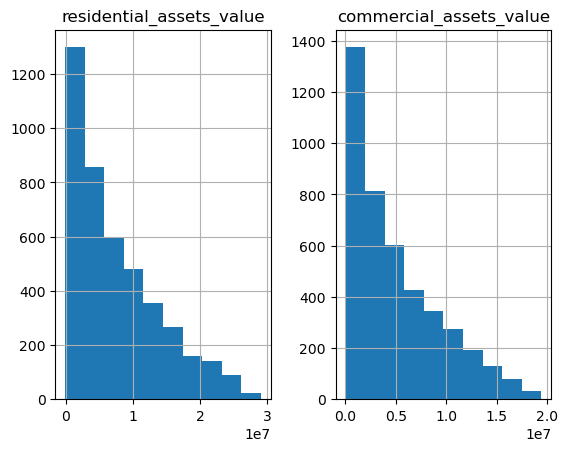

In [93]:
# Create histograms for 'residential_assets_value' and 'commercial_assets_value' columns
df[['residential_assets_value', 'commercial_assets_value']].hist()
plt.show()

According to the above charts(box plots & histograms), both columns have outliers and they are both right skewed distribution.Since the data is not normally distributed , I assumed that I should fill missing values of both columns with median.

In [94]:
# Fill missing values in the 'residential_assets_value' column with the median of the column
df['residential_assets_value'].fillna(df['residential_assets_value'].median(), inplace=True)
# Fill missing values in the 'commercial_assets_value' column with the median of the column
df['commercial_assets_value'].fillna(df['commercial_assets_value'].median(), inplace=True)

/Users/swanhtetaung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



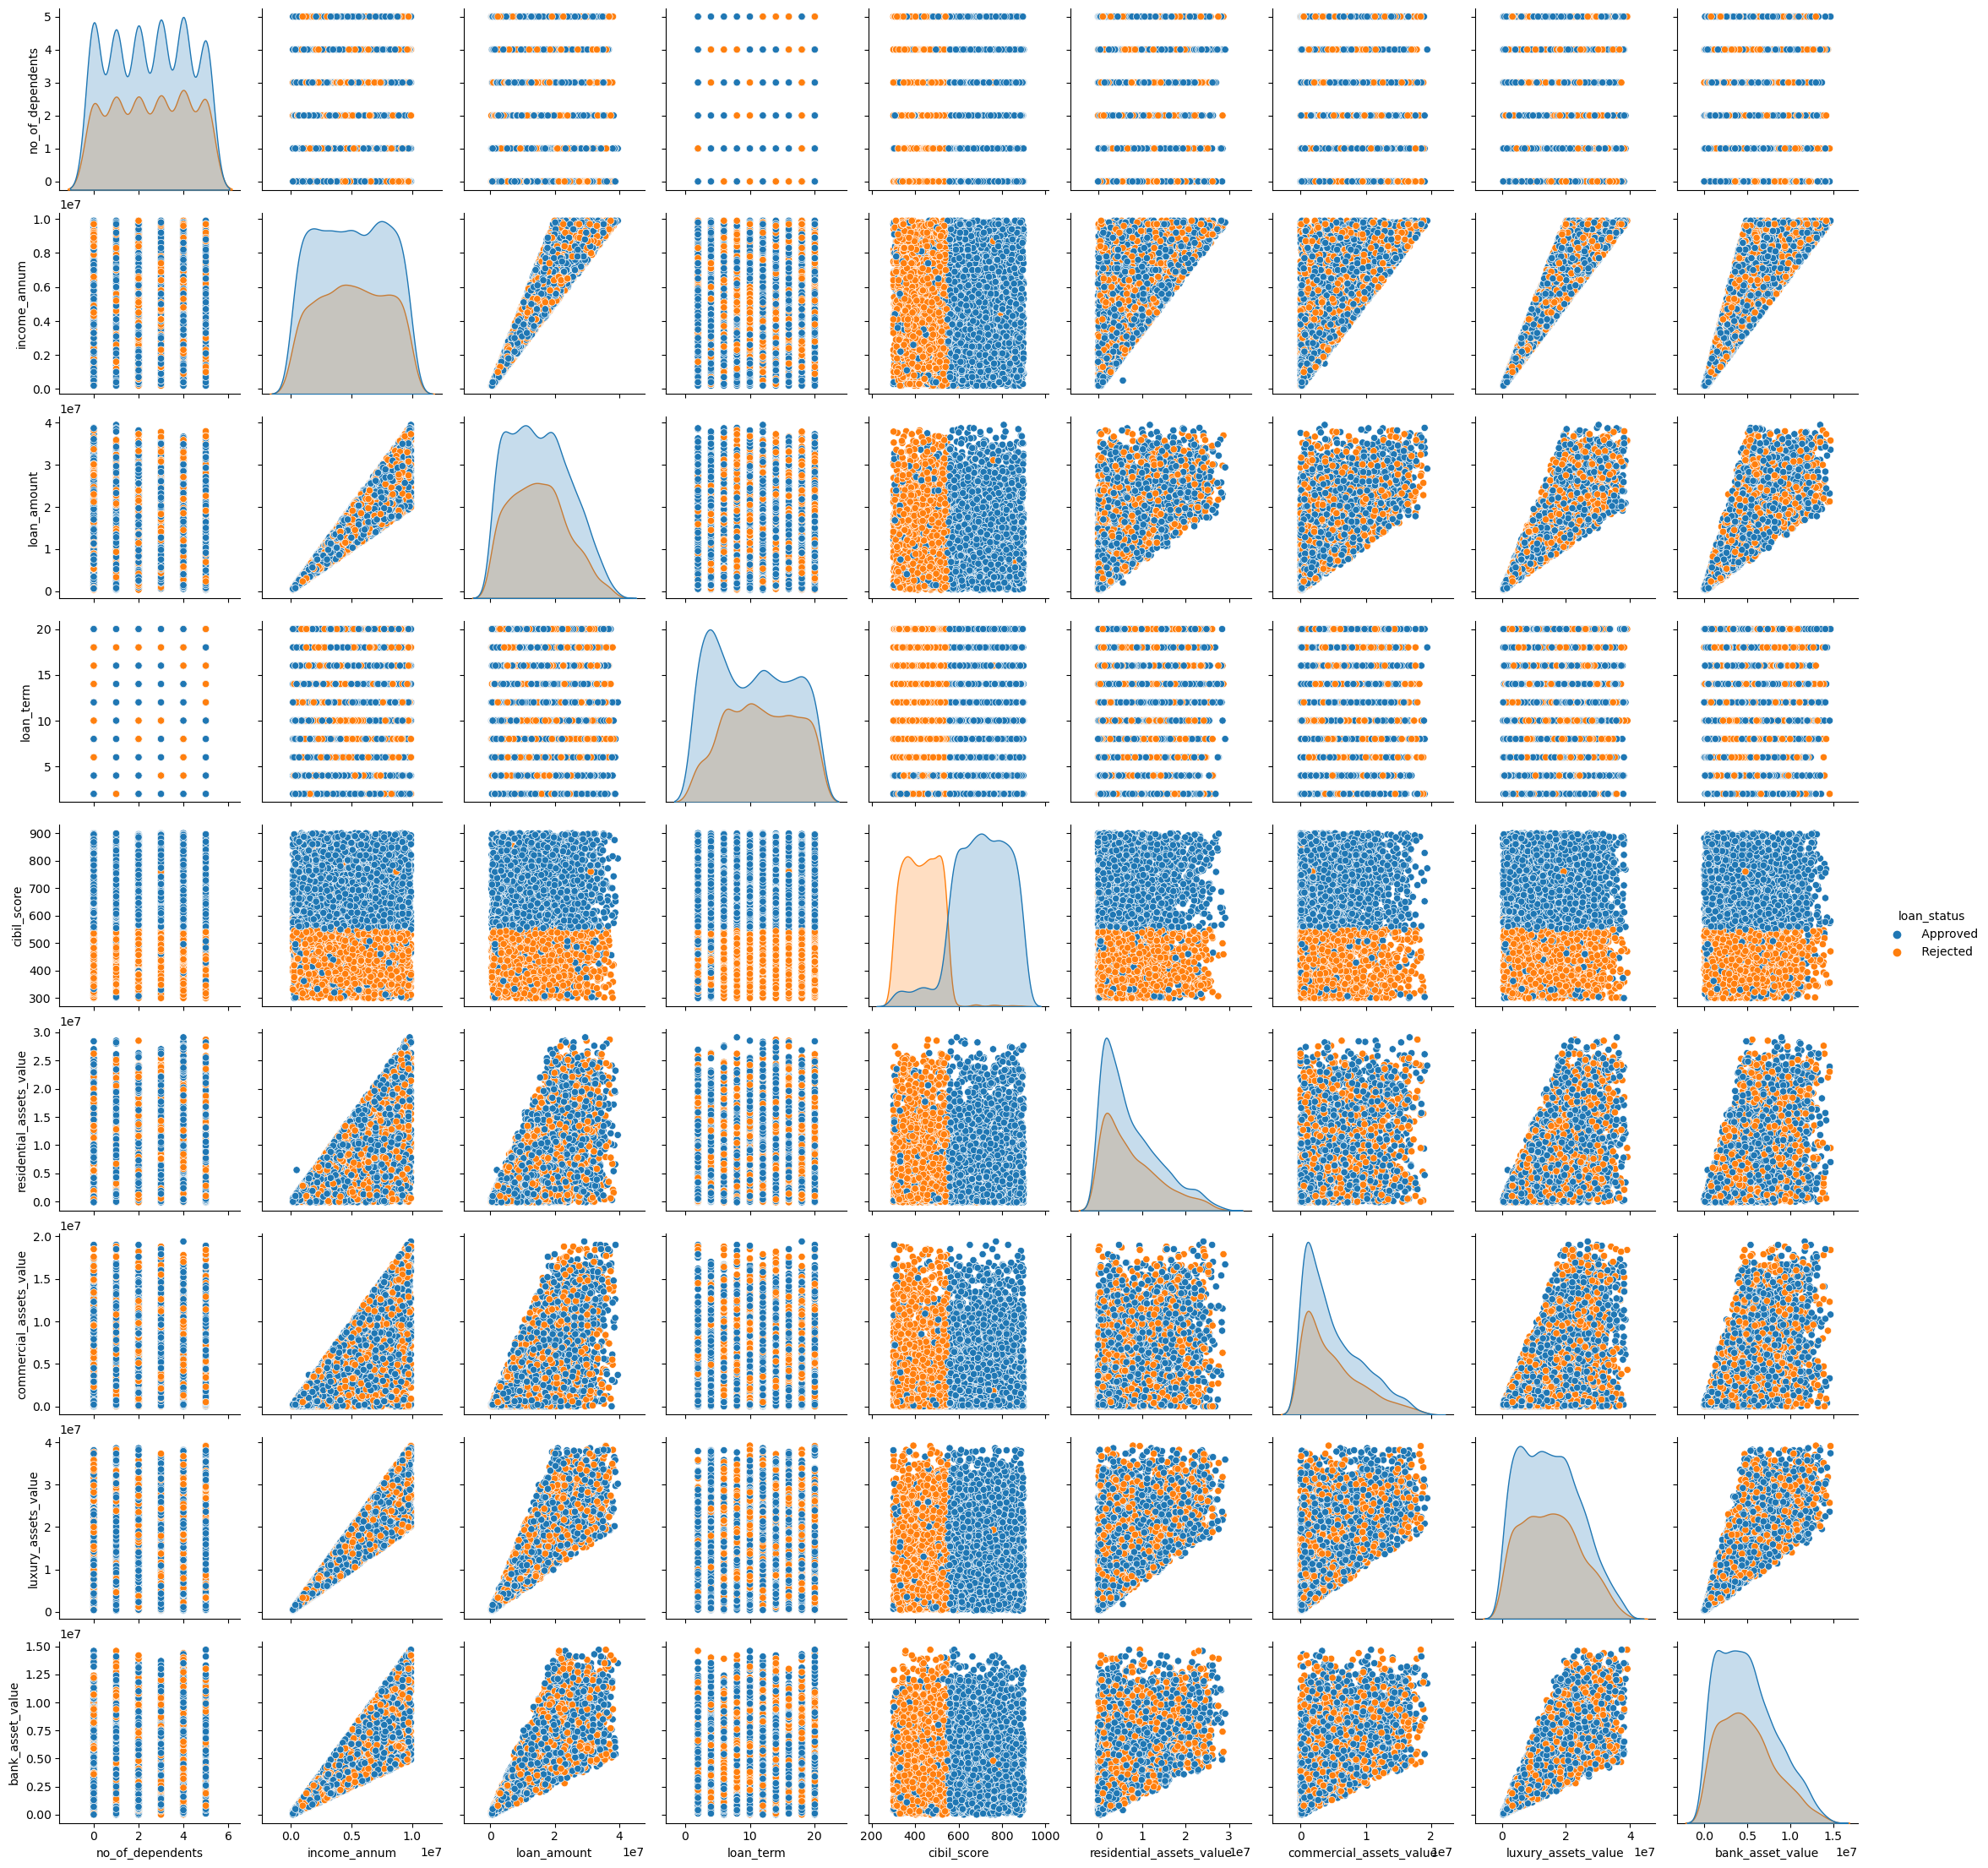

In [95]:
# Create a pairplot to visualize relationships between numeric features in the DataFrame 'df'
sns.pairplot(df.drop(['loan_id'], axis=1),hue = "loan_status")

Based on the chart, it is evident that there is a positive correlation between 'loan_amount' and 'income_annum', 'luxury_assets_value' and 'bank_asset_value', as well as 'income_annum' and 'luxury_assets_value'

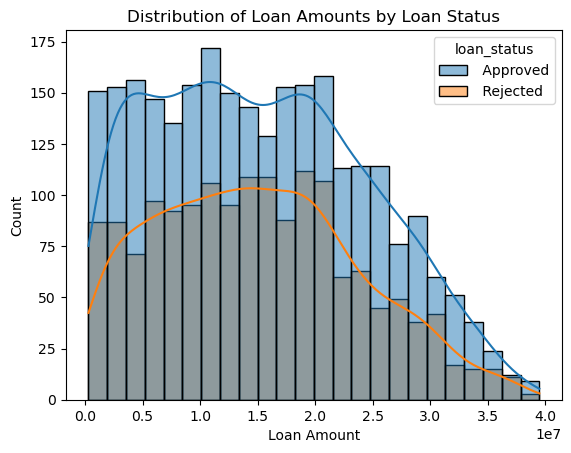

In [96]:
# Plotting a histogram of loan amounts with KDE (Kernel Density Estimate) by loan status
sns.histplot(df, x='loan_amount', hue='loan_status', kde=True)
plt.title("Distribution of Loan Amounts by Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

The KDE lines in the histogram indicate that the distribution of loan amounts is very similar for both approved and rejected loans.This shows that the loan amount alone may not be a strong discriminator in determining loan status.We might need to look at other features as well.

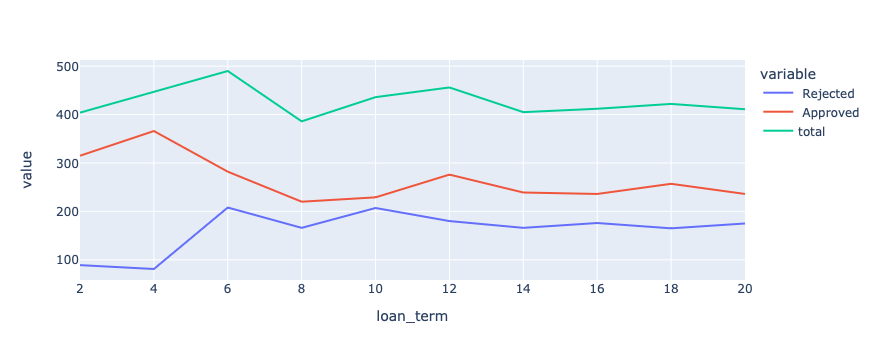

In [97]:
# Creating a cross-tabulation of loan_term and loan_status
df_cross_loan_term = pd.crosstab(index = df['loan_term'], columns = df['loan_status'])
# Adding a 'total' column to the cross-tabulation
df_cross_loan_term['total'] = df_cross_loan_term[' Rejected'] + df_cross_loan_term[' Approved']
# Plotting a line chart using Plotly Express
fig = px.line(df_cross_loan_term, x=df_cross_loan_term.index, y=[' Rejected', ' Approved', 'total'])
# Displaying the plot
fig.show()

The loan approval rate is highest during the 4-year term, while the loan rejection rate is lowest during that time. For a 10-year term, approval and rejection chances become nearly equal, and beyond 10 years, approval chances slightly surpass rejection chances.

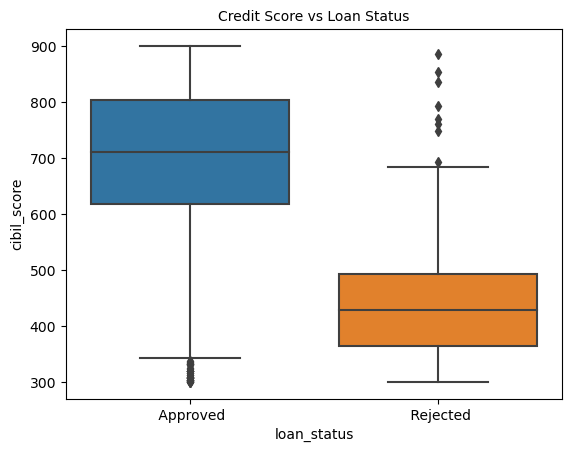

In [98]:
# Plotting a boxplot to visualize the relationship between Credit Score and Loan Status
sns.boxplot(data=df, y="cibil_score", x="loan_status")
plt.title("Credit Score vs Loan Status", fontsize=10)
plt.show()

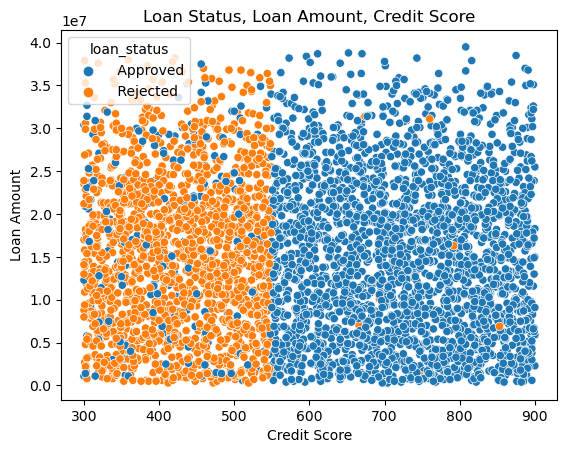

In [23]:
# Creating a scatter plot to visualize the relationship between credit score, loan amount, and loan status
sns.scatterplot(x=df['cibil_score'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

From the above charts, we can see that people with higher credit score are most likely to get their loan approved, but high credit score is not the main criteria of getting thier loans approved as we can see from the charts that there are applicants with higher credit score but whose loan were rejected and people with low credit score whose loans are still approved.

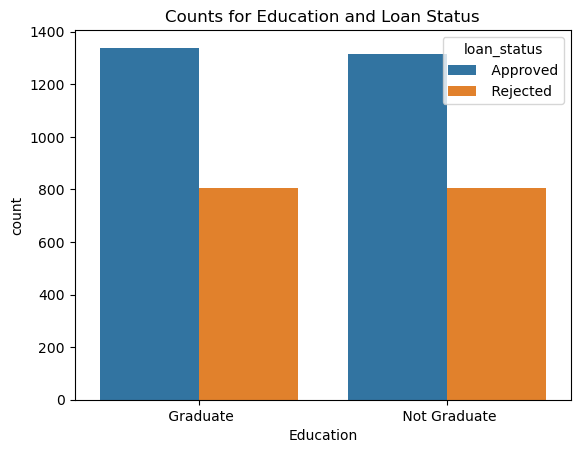

In [99]:
# Plotting a count plot for 'education' with respect to 'loan_status'
sns.countplot(data=df, x='education', hue='loan_status')

# Adding labels and title to the plot
plt.xlabel("Education")
plt.title("Counts for Education and Loan Status")

# Display the plot
plt.show()

The above chart shows that approval and rejection rates for loans are similar for both Graduate and Non-Graduate categories. This suggests that being a Graduate or Non-Graduate doesn't seem to have a big impact on loan approval.

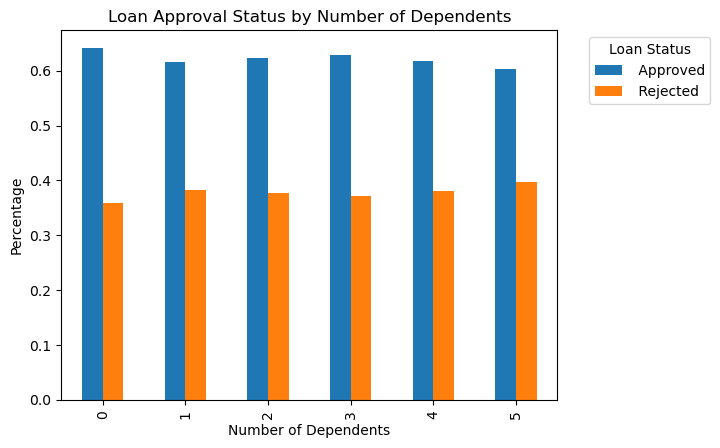

In [100]:
# Calculate the normalized distribution of loan approval status by number of dependents
loan_status_distribution = df.groupby('no_of_dependents')['loan_status'].value_counts(normalize=True).unstack()

# Plot a bar chart for the loan approval status distribution by the number of dependents using the custom palette
loan_status_distribution.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel("Number of Dependents")
plt.ylabel("Percentage")
plt.title("Loan Approval Status by Number of Dependents")

# Add a legend
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


From the chart, we can see that similar distribution across different numbers of dependents suggests that the number of dependents might also not be a strong predictor of loan approval.

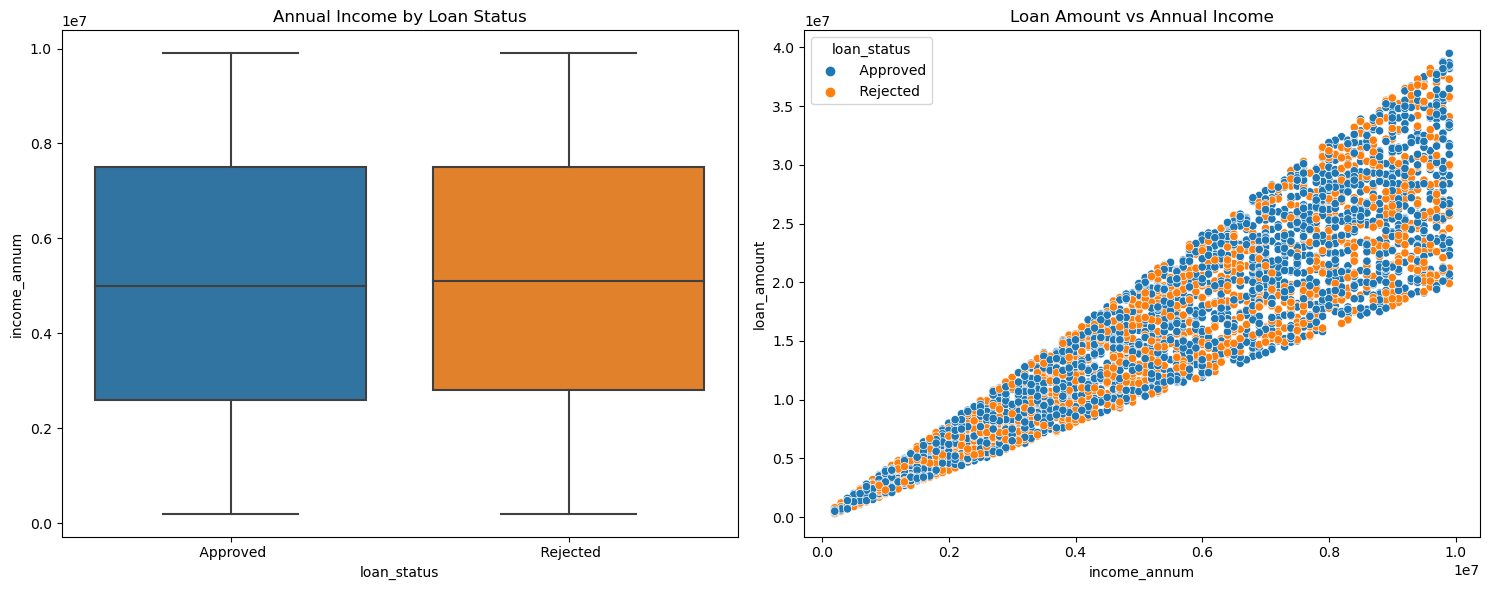

In [101]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 6))

# Create the first subplot - Boxplot for Annual Income by Loan Status
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='income_annum', x='loan_status')
plt.title('Annual Income by Loan Status')

# Create the second subplot - Scatterplot for Loan Amount vs Annual Income, colored by Loan Status
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.title('Loan Amount vs Annual Income')

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()

From the "Annual Income by Loan Status" chart , we can see that there is no clear distinction in income values that separates approved loans for the rejected ones.

In the "Loan Amount vs Annual Income" chart, it is evident that there is a positive correlation between annual income and loan amounts as income increases. However, there is no clear relationship between annual income and loan approval status. Lower-income applicants generally exhibit a narrower range of loan amounts, whereas those with higher incomes enjoy greater flexibility in determining the loan amount.

<Axes: >

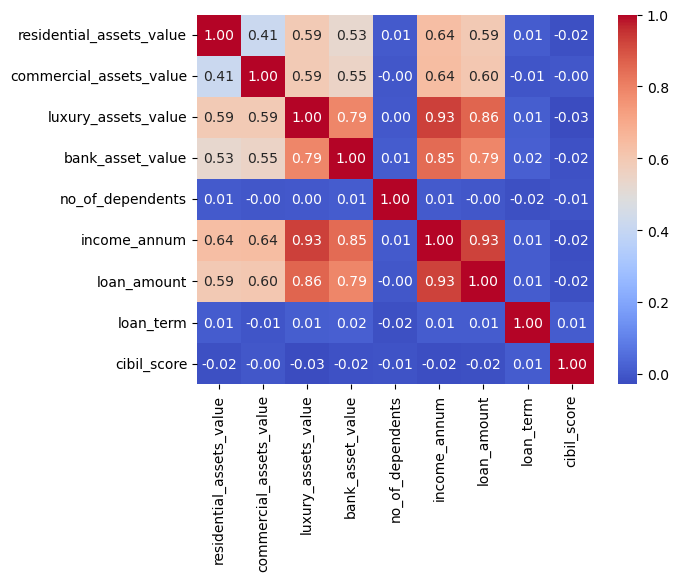

In [102]:
# Extracting relevant columns for correlation analysis
loan_asset = df[['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value', 'no_of_dependents',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',]]

# Calculating correlation matrix
loan_asset_corr = loan_asset.corr()

# Creating a heatmap to visualize correlations
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")

There is a strong positive correlation between loan_amount and income_annum. This correlation is logical since individuals with higher incomes are more likely to apply for larger loans.

The loan amount is also moderately positively correlated with the values of residential assets, commercial assets, luxury assets, and bank assets. This indicates that individuals with higher values for these assets are more likely to request larger loan amounts.

The loan term doesn't appear to have a strong correlation with any of the other factors

Text(0.5, 1.0, 'Counts for Self-Employed or Not')

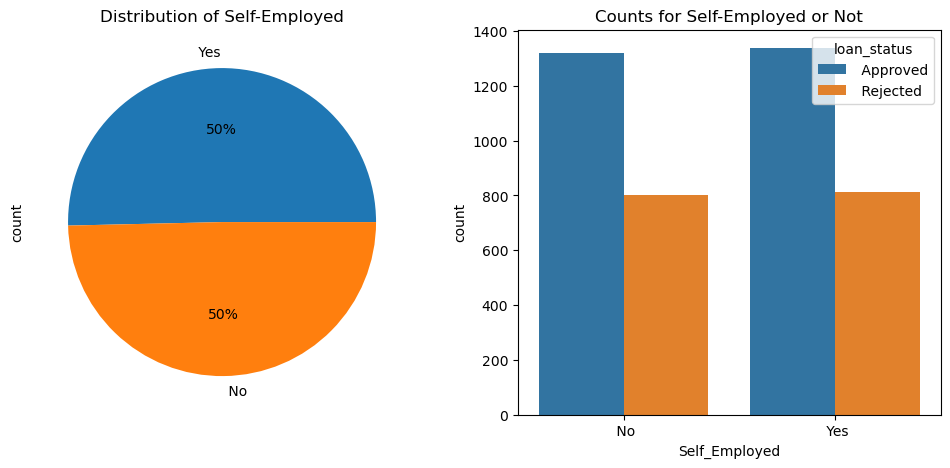

In [103]:
# Plotting the distribution of 'self_employed' using pie chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['self_employed'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of Self-Employed')

# Plotting counts for 'self_employed' and 'loan_status' using countplot
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='self_employed', hue='loan_status')
plt.xlabel('Self_Employed')
plt.title('Counts for Self-Employed or Not')



The distribution of individuals categorized as self-employed and those who are not self-employed appears similar in both charts. This suggests that being self-employed is not a primary factor to consider when predicting loan approval.

# Data Preprocessing

In [104]:
# Dropping 'loan_id' as it's an identifier and not needed for prediction
del df['loan_id']

#### Binning

In [105]:
# Define bins for CIBIL scores and corresponding labels for categories
bins = [0, 600, 700, 800, 900]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
# Create a new column 'cibil_score_category' and categorize CIBIL scores based on the defined bins and labels
df['cibil_score_category'] = pd.cut(df['cibil_score'], bins=bins, labels=labels)

In this step,I am categorizing the CIBIL scores into discrete intervals (bins) and assigning labels to each interval. This can be useful for capturing non-linear relationships between CIBIL scores and the target variable[loan_status].
I assume the following CIBIL score ranges for each category:Poor: [0, 600],Fair: [600, 700],Good: [700, 800],Excellent: [800, 900]
I have assigned category labels 'Poor', 'Fair', 'Good', and 'Excellent' to the respective score ranges.

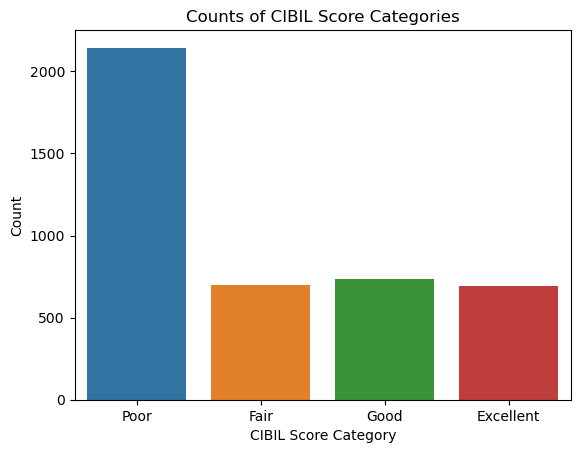

In [106]:
sns.countplot(data=df, x='cibil_score_category')
plt.title('Counts of CIBIL Score Categories')
plt.xlabel('CIBIL Score Category')
plt.ylabel('Count')
plt.show()

As depicted in the chart, individuals with poor credit constitute the majority in the dataset, followed by those with good credit, fair credit, and lastly, excellent credit

#### Combining

In [107]:
# Calculate the total assets for each person by summing up their residential, commercial, luxury, and bank assets
df['total_asset'] = df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']+ df['residential_assets_value']

I assume that aggregating the values of residential_assets_value, commercial_assets_value, luxury_assets_value, and bank_asset_value into the total_asset column enables us to observe the total assets of each person. Considering this total asset value is essential in predicting loan approval

In [33]:
# Calculate the loan-to-income ratio by dividing the loan amount by the annual income for each entry
df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']

I assume that creating a new column called loan_to_income_ratio by dividing loan_amount with income_annum because it provides a normalized measure of how large a loan is relative to the individual's annual income. This ratio can be a valuable feature for predicting loan approval, as financial institutions often use income ratios to assess an applicant's ability to repay a loan.

#### One Hot Encoding

In [108]:
# Apply Categorical Data with One Hot Encoding
features_df = pd.get_dummies(df, columns = ["self_employed","education","cibil_score_category","loan_status"]) 

In [109]:
# Rename the encoded columns for clarity
features_df.rename(columns = {'education_ Graduate':'education', 'self_employed_ Yes':'self_employed', 'loan_status_ Approved':'loan_status' }, inplace = True)

In [110]:
# Drop redundant or unnecessary columns after One Hot Encoding
features_df = features_df.drop(['education_ Not Graduate', 'self_employed_ No', 'loan_status_ Rejected'], axis=1)

In [111]:
# Create a feature matrix 'X' by excluding the target variable 'loan_status' from the DataFrame
X = features_df.drop('loan_status', axis=1)

In [112]:
X.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'total_asset',
       'self_employed', 'education', 'cibil_score_category_Poor',
       'cibil_score_category_Fair', 'cibil_score_category_Good',
       'cibil_score_category_Excellent'],
      dtype='object')

In [113]:
# Create a target variable 'y' containing the 'loan_status' column from the DataFrame
y = features_df['loan_status']

# Model building

In [40]:
# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

###                                            Logistic Regression

In [41]:
# Standardize the features 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [114]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [115]:
# Train Logistic Regression on the LDA-transformed features
model = LogisticRegression(random_state=7)
model.fit(X_train_lda, y_train)

LogisticRegression(random_state=7)

In [116]:
# Make predictions on the test set
y_pred = model.predict(X_test_lda)


In [117]:
# Evaluate the performance
accuracyLG = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report= classification_report(y_test, y_pred)

Athough the accuracy is good enough , I still want to improve the overall acccuracy and performance.

In [118]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

In [119]:
# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [120]:
# Fit the grid search to the data
grid_search.fit(X_train_lda, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=7), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [121]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [122]:
# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_lda)

In [123]:
# Evaluate the performance after tuning
accuracyLG_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

In [124]:
# Print the results before and after hyperparameter tuning
print('\nBefore Hyperparameter Tuning:')
print(f'Accuracy: {accuracyLG:.3f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

print('\nAfter Hyperparameter Tuning:')
print(f'Accuracy: {accuracyLG_tuned:.3f}')
print('Confusion Matrix:')
print(conf_matrix_tuned)
print('Classification Report:')
print(class_report_tuned)


Before Hyperparameter Tuning:
Accuracy: 0.925
Confusion Matrix:
[[461  39]
 [ 57 724]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.92      0.91       500
        True       0.95      0.93      0.94       781

    accuracy                           0.93      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.93      0.93      0.93      1281


After Hyperparameter Tuning:
Accuracy: 0.929
Confusion Matrix:
[[467  33]
 [ 58 723]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.93      0.91       500
        True       0.96      0.93      0.94       781

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281



The model's  accuracy increases from 0.925 to 0.929.



- The model achieved a high accuracy of 92.9%.

- For the "Rejected" class, the model correctly predicted 467 out of 500 instances, with 33 misclassifications. For the "Approved" class, the model correctly predicted 723 out of 781 instances, with 58 misclassifications.

- Precision which measures the accuracy of positive predictions, is noteworthy at 0.85 for the "Rejected" class and 0.96 for the "Approved" class.About 85% of instances predicted as "Rejected" and 96% of instances predicted as "Approved" are accurate.

- Recall which indicates the model's ability to capture actual positive instances, stands at 0.93 for the "Rejected" class and 0.91 for the "Approved" class.The model correctly identifies about 93% of actual "Rejected" instances and 91% of actual "Approved" instances.

- The F1 score, which gives a balanced perspective, is impressive. It's 0.91 for the 'Reject' class and 0.94 for the 'Approve' class. This indicates a good balance between precision and recall for both classes.




### Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state =7)

In [126]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [127]:
y_predict_best = dt_classifier.predict(X_test)

In [128]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree_Accuracy: {dt_accuracy:.4f}")
# Confusion Matrix and Classification Report
conf_matrix_best = confusion_matrix(y_test, y_predict_best)
classification_rep_best = classification_report(y_test, y_predict_best)

print("Confusion Matrix (Best Model):\n", conf_matrix_best)
print("Classification Report (Best Model):\n", classification_rep_best)

DecisionTree_Accuracy: 0.9251
Confusion Matrix (Best Model):
 [[495   5]
 [  6 775]]
Classification Report (Best Model):
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       500
        True       0.99      0.99      0.99       781

    accuracy                           0.99      1281
   macro avg       0.99      0.99      0.99      1281
weighted avg       0.99      0.99      0.99      1281




The Decision Tree model achieved a high accuracy of 92.51%.

- For the "Rejected" class, the model correctly predicted 495 out of 500 instances, with 5 misclassifications. For the "Approved" class, the model correctly predicted 775 out of 781 instances, with 6 misclassifications.

- Precision, which measures the accuracy of positive predictions, is noteworthy at 0.99 for the "Rejected" class and 0.99 for the "Approved" class. About 99% of instances predicted as "Rejected" and 99% of instances predicted as "Approved" are accurate.

- Recall, which indicates the model's ability to capture actual positive instances, stands at 0.99 for both the "Rejected" and "Approved" classes. The model correctly identifies about 99% of actual "Rejected" instances and 99% of actual "Approved" instances.

- The F1 score, which gives a balanced perspective, is impressive. It's 0.99 for the 'Rejected' class and 0.99 for the 'Approved' class. This indicates a good balance between precision and recall for both classes.





### Support Vector Machine

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [58]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler fitted on the training data
X_test = scaler.transform(X_test)

In [59]:
# Create a Support Vector Machine (SVM) model
svm_model = SVC()

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Make predictions on the training set for evaluation
svm_predictions_train = svm_model.predict(X_train)

# Evaluate the accuracy on the test set
svm_accuracy = accuracy_score(y_test, svm_predictions)




In [60]:
# Print the accuracy of the Support Vector Machines model on the test set
print(f"Support Vector Machines Accuracy: {svm_accuracy:.4f}")

# Print the confusion matrix and classification report for the Support Vector Machines model on the test set
print("Support Vector Machines Classification Report:")
conf_matrix_best = confusion_matrix(y_test, y_predict_best)
print("Confusion Matrix \n", conf_matrix_best)
print(classification_report(y_test, svm_predictions))



Support Vector Machines Accuracy: 0.9375
Support Vector Machines Classification Report:
Confusion Matrix 
 [[495   5]
 [  6 775]]
              precision    recall  f1-score   support

       False       0.90      0.95      0.92       500
        True       0.97      0.93      0.95       781

    accuracy                           0.94      1281
   macro avg       0.93      0.94      0.94      1281
weighted avg       0.94      0.94      0.94      1281




The Support Vector Machines model achieved a high accuracy of 93.75%.

- The confusion matrix shows that out of 500 instances of the "Rejected" class, 495 were correctly predicted, and 5 were misclassified. For the "Approved" class, out of 781 instances, 778 were correctly predicted, and 3 were misclassified.

- Precision, which measures the accuracy of positive predictions, is noteworthy at 0.97 for the "Approved" class and 0.90 for the "Rejected" class. About 97% of instances predicted as "Approved" and 90% of instances predicted as "Rejected" are accurate.

- Recall, which indicates the model's ability to capture actual positive instances, stands at 0.95 for the "Rejected" class and 0.93 for the "Approved" class. The model correctly identifies about 95% of actual "Rejected" instances and 93% of actual "Approved" instances.

- The F1 score, which gives a balanced perspective, is impressive. It's 0.92 for the 'Rejected' class and 0.95 for the 'Approved' class. This indicates a good balance between precision and recall for both classes.





### RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold

# Creating a RandomForestClassifier with optimized hyperparameters
rf_opt = RandomForestClassifier(n_estimators = 150, 
                                max_depth = None, 
                                min_samples_leaf = 1, 
                                min_samples_split = 5,
                                random_state = 0)




In [62]:
# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [63]:
# Perform 10-fold cross-validation with shuffling
cv = KFold(n_splits=10, shuffle=True, random_state=7)
cv_scores = cross_val_score(rf_opt, X, y, cv=cv)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Print the average accuracy across all folds
print("Average Accuracy:", cv_scores.mean())

Cross-validated Accuracy Scores: [0.99765808 0.99765808 0.99297424 0.99765808 0.99765808 0.99531616
 0.99765808 0.99531616 0.99297424 0.99765258]
Average Accuracy: 0.9962523776539015


The cross-validated accuracy scores are consistent across different folds, ranging from 0.9929 to 0.9977, with an average accuracy of approximately 0.9963.
The consistency in performance across folds is a positive indicator that the model is **not fitting too closely to the specific characteristics of the training data**.

In [129]:
# Training the RandomForestClassifier on the training set
rf_opt.fit(X_train, y_train)

# Predicting labels for the test set using the trained RandomForestClassifier
y_rf = rf_opt.predict(X_test)

#calculating accuracy for random forest model
rf_accuracy_score = accuracy_score(y_test, y_rf)

In [130]:
# Printing accuracy of the RandomForestClassifier on the test set
print('AccuracyTesting:', '%.3f' % rf_accuracy_score)

AccuracyTesting: 0.996


The accuracy on the testing set is 99.6%, which is very close to the average cross-validated accuracy.
The minimal difference between the testing accuracy and cross-validated accuracy show that my model (RF) is generalizing well to new, unseen data.

In [131]:
# Predicting the labels for the training set using the trained RandomForestClassifier
y_train_rf = rf_opt.predict(X_train)
# Printing the accuracy of the RandomForestClassifier on the training set
print('AccuracyTraining:', '%.3f' % accuracy_score(y_train, y_train_rf))

AccuracyTraining: 0.998


The accuracy on the training set is 0.998, indicating high performance on the data it was trained on.
While the training accuracy is slightly higher than the testing accuracy, the difference is relatively small, and the training accuracy is not significantly inflated.

In [67]:
# Classification Report
class_report = classification_report(y_test, y_rf)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       500
        True       0.99      1.00      1.00       781

    accuracy                           1.00      1281
   macro avg       1.00      0.99      1.00      1281
weighted avg       1.00      1.00      1.00      1281



For the "Rejected" class, the model achieved an precision of 1.0 which indicates that all instances predicted as "Rejected" were indeed "Rejected." The recall for this class is 0.99 that showcases the model's ability to correctly identify 99% of actual "Rejected" instances. The F1-score which is a balanced measure of precision and recall, is commendable at 0.99.

Turning to the "Approved" class, precision stands at 0.99,that shows that 99% of instances predicted as "Approved" are accurate. The recall for the "Approved" class is 1.00, highlighting the model's capability to capture all actual "Approved" instances. The F1-score for this class is a perfect 1.00, underlining a  balance between precision and recall.

The precision, recall, and F1-scores provided in the classification report are consistently high for both classes. This indicates that your model is performing well on various aspects of classification, and there are no signs of **overfitting** to specific patterns in the training data

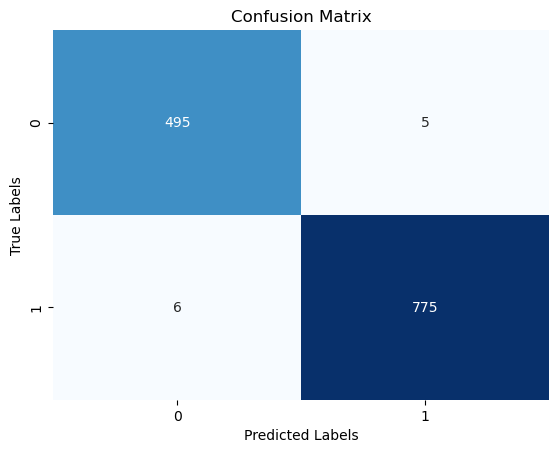

In [68]:
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The scores in the confusion matrix above mean:

- True negatives (upper left): The model accurately predicted rejection for 495 loan applications that were indeed rejected.

- False negatives (bottom left): The model incorrectly predicted rejection for 3 loan applications that were actually approved.

- False positives (upper right): The model incorrectly predicted approval for 5 loan applications that were actually rejected.

- True positives (bottom right): The model accurately predicted approval for 778 loan applications that were indeed approved.

#### Feature Importance

In [132]:
importances = rf_opt.feature_importances_

feature_labels = np.array(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                           'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                           'luxury_assets_value', 'bank_asset_value', 'total_asset',
                           'loan_to_income_ratio', 'self_employed',
                           'education',
                           'cibil_score_category_Poor', 'cibil_score_category_Fair',
                           'cibil_score_category_Good', 'cibil_score_category_Excellent'])

importance = rf_opt.feature_importances_
# Sort features by importance
features_indexes_by_importance = importance.argsort()

# Print feature importance
for index in features_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))




self_employed - 0.04%
education - 0.06%
no_of_dependents - 0.24%
commercial_assets_value - 0.46%
bank_asset_value - 0.47%
luxury_assets_value - 0.55%
income_annum - 0.56%
residential_assets_value - 0.58%
total_asset - 0.68%
loan_amount - 0.96%
cibil_score_category_Excellent - 3.37%
loan_to_income_ratio - 4.14%
cibil_score_category_Fair - 4.16%
cibil_score_category_Good - 4.27%
loan_term - 7.50%
cibil_score_category_Poor - 18.53%
cibil_score - 53.42%


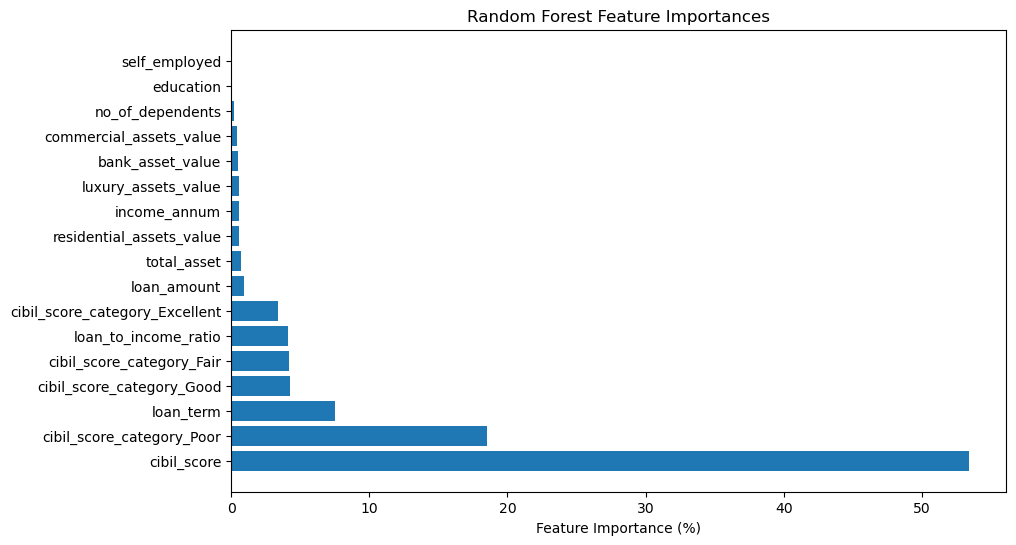

In [134]:
# Sort features by importance
sorted_indexes = features_indexes_by_importance[::-1]
sorted_importance = importance[sorted_indexes]
sorted_feature_labels = feature_labels[sorted_indexes]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance * 100, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_labels)
plt.xlabel('Feature Importance (%)')
plt.title('Random Forest Feature Importances')
plt.show()

Upon reviewing the chart, it is evident that cibil_score significantly stands out as the most influential factor affecting the model's predictions. This prominence may be attributed to the noteworthy relationship between cibil_score and the target variable, loan_status. It's important to emphasize that the importance of a feature does not necessarily imply direct causation of predicted outcomes. Various factors, interactions between features, and potential data noise can impact these findings. Considering that every feature in this model possesses some level of importance, regardless of its magnitude, I have decided not to remove any features. Each feature contributes to the model's predictions, and this holistic approach ensures that all relevant information is considered.

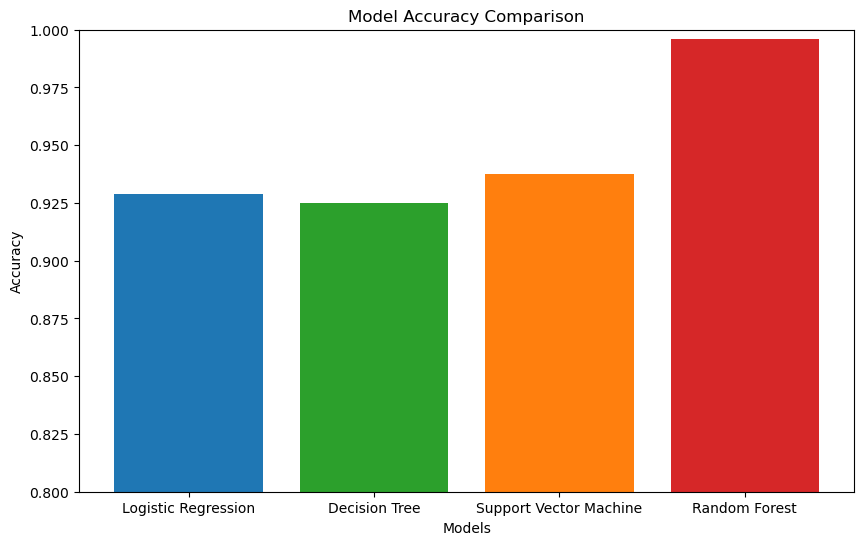

In [135]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
model_names = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest']
accuracy_scores = [accuracyLG_tuned, dt_accuracy, svm_accuracy, rf_accuracy_score]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed
plt.show()


These are the reasons why I choose RandomForest as my depolyment model.

**High Accuracy**:
We observe from the chart that the Random Forest model outperforms other models in terms of accuracy.

**Avoids Overfitting**:
Despite achieving high accuracy, we can also see that the model avoids fitting too closely to specific patterns in the training data. The minimal difference between testing accuracy and cross-validated accuracy indicates that our Random Forest model generalizes effectively to new, unseen data.

**Consistent Metrics**:
We can observe that precision, recall, and F1-scores consistently approach perfection for both "Rejected" and "Approved" classes. This consistency reflects high accuracy and balanced classification across various aspects.
Analyzing the confusion matrix, we can also see the model's accuracy in predicting both rejection and approval instances.

### Prediction

In [136]:
input_data = {
    'no_of_dependents': 2,
    'income_annum': 9600000,
    'loan_amount': 29900000,
    'loan_term': 12,
    'cibil_score': 778,
    'residential_assets_value': 2400000.0,
    'commercial_assets_value': 17600000.0,
    'luxury_assets_value': 22700000,
    'bank_asset_value': 8000000,
    'total_asset': 50700000.0,
    'loan_to_income_ratio': 3.114583,
    'self_employed': False,
    'education': True,
    'cibil_score_category_Poor': False,
    'cibil_score_category_Fair': False,
    'cibil_score_category_Good': True,
    'cibil_score_category_Excellent': False
    
}

# Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Make a prediction
prediction = rf_opt.predict(input_df)
if prediction == True:
    print("Predicted Loan Approval Status: Approve")
else:
    print("Predicted Loan Approval Status: Reject")
    


Predicted Loan Approval Status: Approve


In [73]:
# Save the trained RandomForestClassifier model 
import joblib
joblib.dump(rf_opt,"models/model.pkl")

['models/model.pkl']